# 2024-Spring Data Science Homework 4
## Due: 2024/05/24 23:59
### ID: 111590038
### Name: 卓柏辰 


### Problem1:
- 請參考Lab9，比較並繪製金磚五國（BRICS）Covid19疫情的確診趨勢圖(至少要畫出Trajectory圖)，分別為巴西、俄羅斯、印度、中華人民共和國、南非。


#### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 資料預處理

In [12]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url)
data.drop(columns=['Province/State' , 'Lat', 'Long'], inplace= True)
data = data.groupby('Country/Region').sum()
data.columns = pd.to_datetime(data.columns)
data = data.transpose()
data.index.name = 'date'
countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
data = data[countries]
data

C:\Users\bryan\AppData\Local\Temp\ipykernel_13408\3115362591.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.columns = pd.to_datetime(data.columns)


Country/Region,Brazil,Russia,India,China,South Africa
date,,,,,
2020-01-22,0,0,0,548,0
2020-01-23,0,0,0,643,0
2020-01-24,0,0,0,920,0
2020-01-25,0,0,0,1406,0
2020-01-26,0,0,0,2075,0
...,...,...,...,...,...
2023-03-05,37081209,22029824,44689327,4903524,4064889
2023-03-06,37076053,22040875,44689593,4903524,4065857
2023-03-07,37076053,22051220,44689919,4903524,4066044


#### 輸出圖形

1. 折線圖

<Axes: title={'center': 'Total Covid-19 Confirmed Cases'}, xlabel='date'>

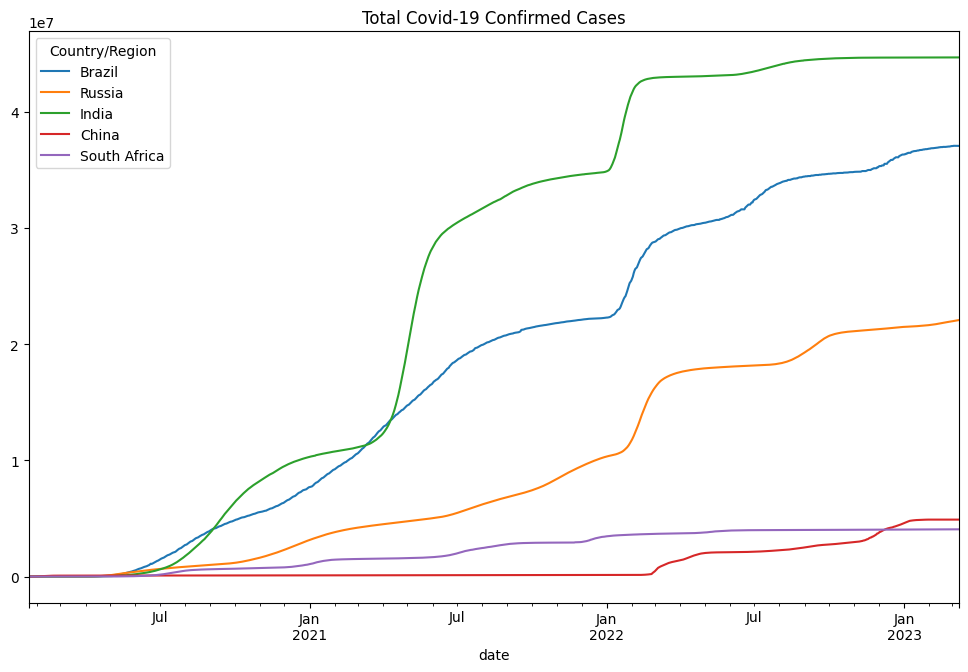

In [13]:
size = (12, 12 * 2 / (1 + 5 ** 0.5))
data.plot(figsize= size, kind= 'line', title= 'Total Covid-19 Confirmed Cases')

2. 柱狀圖

<Axes: title={'center': 'Total Covid-19 Confirmed Cases'}, xlabel='date'>

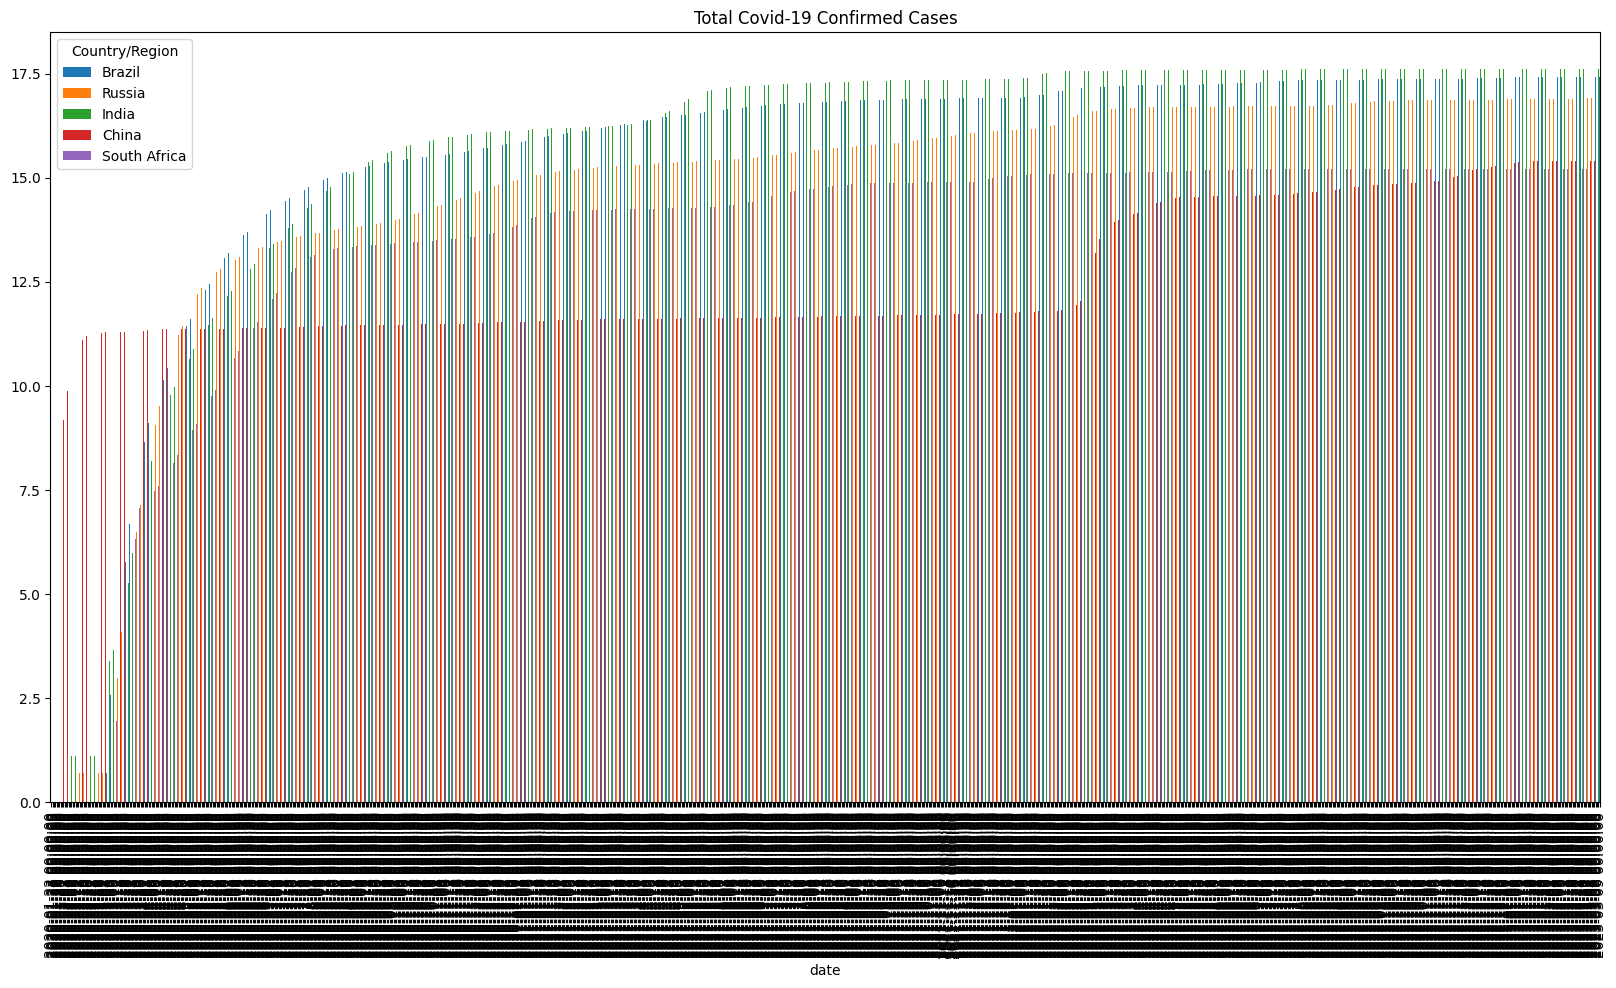

In [14]:
data.apply(np.log).plot(figsize= (20, 10), kind='bar', title= 'Total Covid-19 Confirmed Cases')

#### 資料的變化

In [15]:
data_diff = data.diff()
data_diff

Country/Region,Brazil,Russia,India,China,South Africa
date,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,95.0,0.0
2020-01-24,0.0,0.0,0.0,277.0,0.0
2020-01-25,0.0,0.0,0.0,486.0,0.0
2020-01-26,0.0,0.0,0.0,669.0,0.0
...,...,...,...,...,...
2023-03-05,0.0,13418.0,281.0,0.0,0.0
2023-03-06,-5156.0,11051.0,266.0,0.0,968.0
2023-03-07,0.0,10345.0,326.0,0.0,187.0


1. 每日變化

<Axes: title={'center': 'New Cases Per Day'}, xlabel='date'>

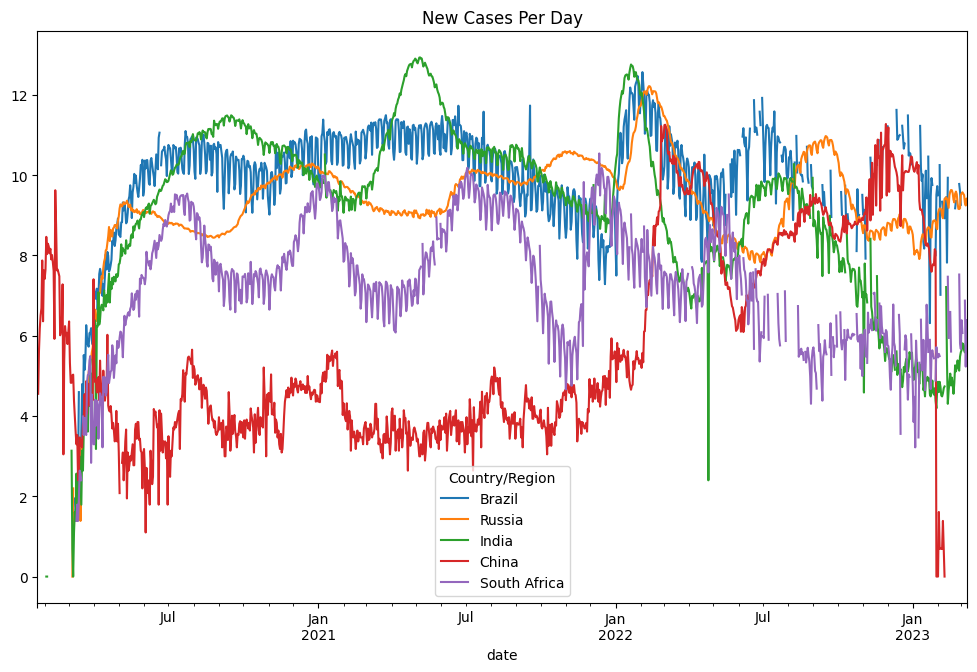

In [17]:
data_diff.apply(np.log).plot(figsize= size, kind= 'line', title='New Cases Per Day')

2. Rolling Data 平移資料

<Axes: title={'center': 'New Cases Per Day after Smoothing (Smoothed)'}, xlabel='date'>

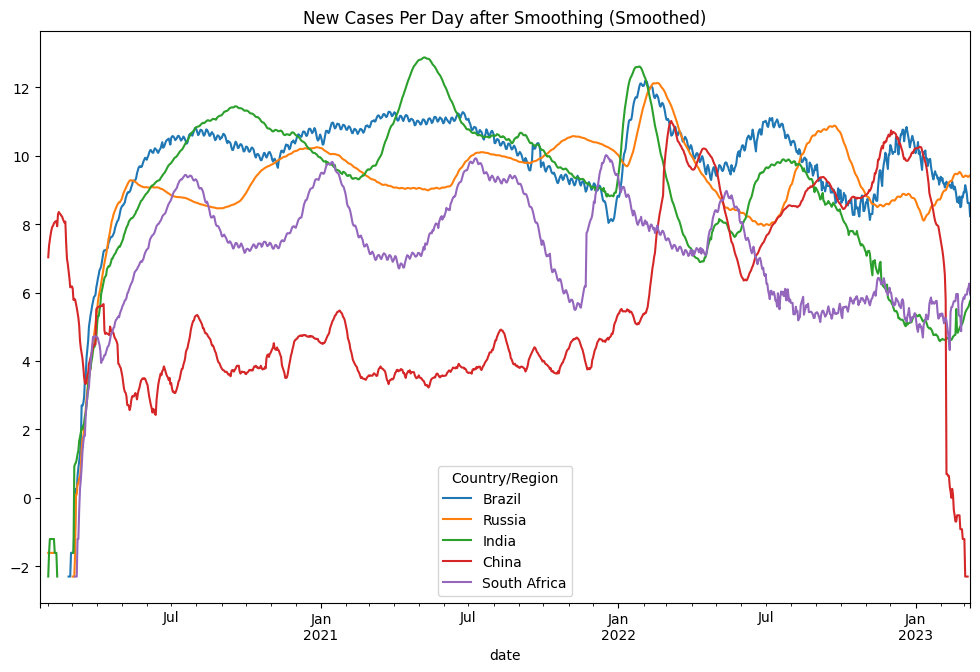

In [18]:
data_roll = data_diff.rolling(window=10, win_type=None).mean()
data_roll.apply(np.log).plot(figsize=size, kind='line', title='New Cases Per Day after Smoothing (Smoothed)')

#### Trajectory Graph 軌跡圖

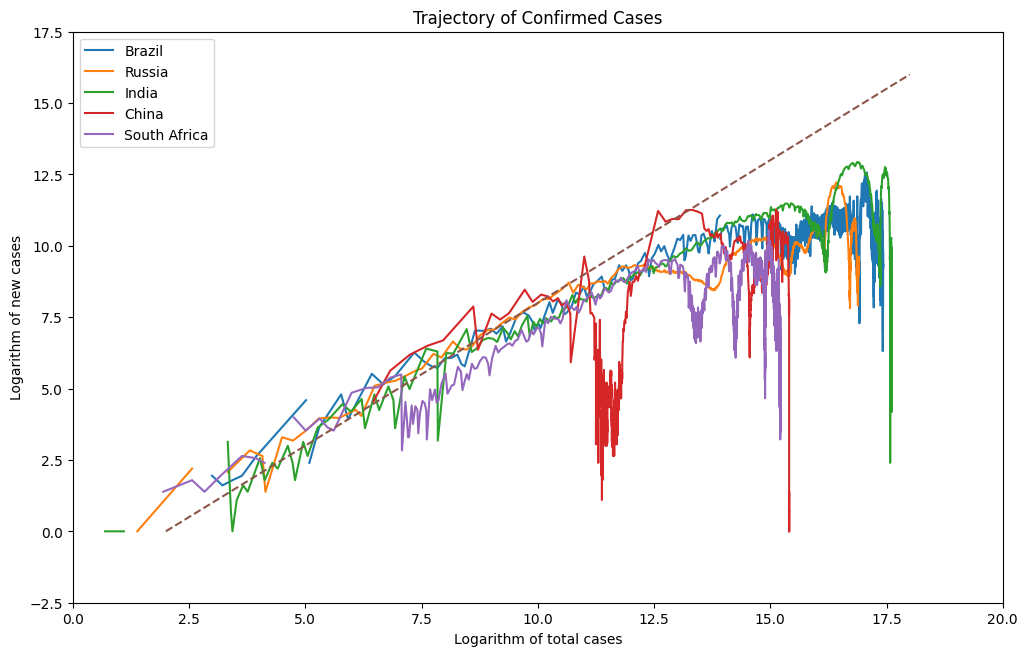

In [23]:
plt.figure(figsize= size)
plt.title('Trajectory of Confirmed Cases')
plt.xlabel('Logarithm of total cases')
plt.ylabel('Logarithm of new cases')
plt.xlim((0, 20))
plt.ylim((-2.5, 17.5))
for col in data.columns:
    plt.plot(data[col].apply(np.log), data_diff[col].apply(np.log), label= col)
plt.plot([2, 18], [0, 16], linestyle= '--')
plt.legend()

### Problem2: 手寫過程在紙上後拍照用Markdown附上
- 如何使用Naïve Bayes classifier技術判斷下列表格的第八份文件(Test Document)是一份高興的文件或是不高興的文件? 
- 指定為高興(h)文件或是不高興(~h)文件的機率各自為何?

| RID | type | text | 
| :-: | :-: | :-: | 
| D1 | Happy(h) | love happy happy joy smile angry |
| D2 | Happy(h) | cry happy joy love happy |
| D3 | Happy(h) | good happy love cry love |
| D4 | Happy(h) | pain love happy joy love |
| D5 | Unhappy(~h) | love angry pain pain |
| D6 | Unhappy(~h) | love angry pain |
| D7 | Unhappy(~h) | angry angry pain |
| D8 | ?? | cry love angry pain |


#### My Answer
![第一頁](<../Homework/photo/Hw4-1.jpg> "Naïve Bayes classifier")